In [1]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plot


In [3]:
train_dataset = datasets.FashionMNIST('data/',train = True,download = True,
                                     transform = transforms.Compose([transforms.ToTensor()]))

test_dataset = datasets.FashionMNIST('data/',train = False,download = True,
                                    transform = transforms.Compose([transforms.ToTensor()]))

In [60]:
#len(train_dataset)
train_dataset.targets # train_dataset.train_label is deprecated so we use targets instead

tensor([9, 0, 0,  ..., 3, 0, 5])

In [5]:
sample = next(iter(train_dataset))

len(sample)

type(sample)

image, label = sample

print(label)

image.squeeze().shape

9


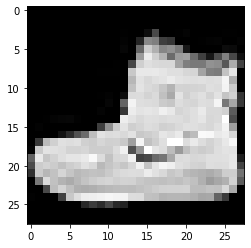

In [11]:
plot.imshow(image.squeeze(),cmap='gray')
print(label)

In [12]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=20)

In [13]:
batch = next(iter(train_loader))

In [14]:
images, labels = batch

In [15]:
images.shape

torch.Size([20, 1, 28, 28])

In [16]:
labels.shape

torch.Size([20])

labels : tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4])


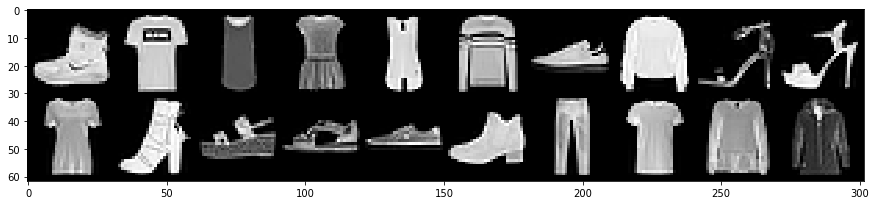

In [17]:
grid = torchvision.utils.make_grid(images,nrow=10)
plot.figure(figsize=(15,15))
plot.imshow(np.transpose(grid,(1,2,0)))
print('labels :',labels)

In [46]:
net = NeuralNet()
print(net)

for param in net.parameters():
    print(param.shape)

for name,param in net.named_parameters():
    print(name,'\t\t',param.shape)

NeuralNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


In [27]:
fc = nn.Linear(in_features=4, out_features=3, bias=False)
in_feature = torch.tensor([1,2,3,4],dtype = torch.float32)
weight_matrix = torch.tensor([[1,2,3,4],
                             [2,3,4,5],
                            [3,4,5,6]], dtype=torch.float32)

fc.weight = nn.Parameter(weight_matrix)

fc(in_feature) # the output is not exactly the matrix mul of the
                # weight matrix and in_feature because the Linear layer is adding a bias
                #the bias can be toggled in the constructor of layer

# disables the pytorch real time gradient calculation
#this stops pytorch from building computation graphs when data flows through n/w
#Computation graphs keep track of network's mapping by tracking each computation as the data propogates through the network
# we can turn it back on once we start training 
torch.set_grad_enabled(False) 

In [32]:
sample = next(iter(train_dataset))

image,label = sample

image.shape

# Conv layer classes expect a rank 4 tensor of the shape 
#torch.tensor([batch_size,input_channels,height,width])
image.unsqueeze(0).shape # gives a batch with size of 1

In [64]:
#Each time we create a network the predictions would be different since the weights are random
prediction = net(image.unsqueeze(0)) # invokes the __call__() whichinvokes forward()
prediction

tensor([[-0.0755, -0.1229, -0.1097, -0.0280,  0.1143,  0.0608,  0.0109,  0.0069,
         -0.0178,  0.0777]])

In [65]:
print(label)
print(prediction.shape)

9
torch.Size([1, 10])


In [66]:
prediction.argmax(dim=1)

tensor([4])

In [67]:
#if we want the probability we can use the softmax function
#we would notice that the prediction for each of the class is 10%
#since we have 10 classes and balanced dataset.
nn.functional.softmax(prediction, dim=1)

tensor([[0.0932, 0.0889, 0.0901, 0.0978, 0.1127, 0.1069, 0.1017, 0.1013, 0.0988,
         0.1087]])

In [6]:
net = NeuralNet()

In [7]:
data_loader = torch.utils.data.DataLoader(train_dataset
                                          ,batch_size=10)

In [8]:
batch = next(iter(data_loader))

In [9]:
images, labels = batch

In [10]:
 images.shape

torch.Size([10, 1, 28, 28])

In [11]:
labels.shape

torch.Size([10])

In [12]:
pred = net(images)

In [14]:
pred.shape

torch.Size([10, 10])

In [15]:
pred

tensor([[-0.0483,  0.0032, -0.0579, -0.1052, -0.0790,  0.0173, -0.0184,  0.1257,
         -0.0582, -0.1175],
        [-0.0436,  0.0094, -0.0617, -0.1073, -0.0794,  0.0176, -0.0144,  0.1327,
         -0.0566, -0.1141],
        [-0.0395,  0.0077, -0.0634, -0.1036, -0.0838,  0.0214, -0.0150,  0.1210,
         -0.0605, -0.1148],
        [-0.0375,  0.0074, -0.0638, -0.1039, -0.0824,  0.0208, -0.0151,  0.1253,
         -0.0601, -0.1144],
        [-0.0371,  0.0124, -0.0613, -0.1050, -0.0832,  0.0249, -0.0145,  0.1296,
         -0.0592, -0.1132],
        [-0.0418,  0.0062, -0.0601, -0.1053, -0.0817,  0.0151, -0.0124,  0.1266,
         -0.0577, -0.1153],
        [-0.0449,  0.0043, -0.0650, -0.1104, -0.0826,  0.0215, -0.0077,  0.1256,
         -0.0604, -0.1125],
        [-0.0423,  0.0101, -0.0619, -0.1052, -0.0769,  0.0221, -0.0085,  0.1340,
         -0.0573, -0.1127],
        [-0.0443,  0.0057, -0.0572, -0.1062, -0.0850,  0.0169, -0.0151,  0.1188,
         -0.0653, -0.1157],
        [-0.0470,  

In [20]:
pred.argmax(dim=1)

tensor([7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [17]:
labels

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])

In [25]:
pred.argmax(dim=1).eq(labels).sum().item()

1

In [22]:
torch.set_printoptions(linewidth=120)
torch.set_grad_enabled(True)